#Tugas Percobaan Pertemuan 1 (Kelas B) - Preproses dokumen menggunakan spaCy
###Aldo Frsika Darma Putra (195150207111037)

###Tahap preproses dalam Text Mining merupakan tahapan krusial/penting, salah satu library yang bisa digunakan adalah spaCy. Pada Tugas ini, Anda diminta untuk melakukan pemrosesan terhadap dokumen teks berbahasa indonesia dengan beberapa langkah sebagai berikut:

1.  Pilih sebuah artikel pada jurnal (https://j-ptiik.ub.ac.id/index.php/j-ptiik) ;
2.  Ambil bagian abstrak berbahasa Indonesia
3.  Lakukan praproses menggunakan library spaCy https://spacy.io/
4.  Upload kode program Python yang berisi langkah-langkah tersebut pada halaman Eling

link dokumen: https://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/11477

##Tahapan Text Preprocessing
1. Case Folding
2. Tokenization
3. Stopword Removal (filtering)
4. Lemmatization
5. Stemming

##===============================

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pip install -U spacy
# python -m spacy download en_core_web_sm
import spacy
import re
import Sastrawi

spacy.info()

{'spacy_version': '3.4.1',
 'location': '/usr/local/lib/python3.7/dist-packages/spacy',
 'platform': 'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic',
 'python_version': '3.7.13',
 'pipelines': {'en_core_web_sm': '3.4.0'}}

In [ ]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")
nlpId = spacy.blank("id")

In [ ]:
# Process whole documents
text = ("""Review pada Google Play Store merupakan salah satu fitur yang digunakan untuk memberikan suatu penilaian terhadap suatu aplikasi. 
TIX ID merupakan salah satu perusahaan layanan atau aplikasi pemesanan tiket film bioskop secara online yang dibuat oleh PT Nusantara Elang Sejahtera. 
Aplikasi ini memberikan layanan seperti memesan tiket film dari bioskop favorit, memilih film online untuk dibeli atau disewa, dan membeli voucher untuk menonton film streaming online. 
Namun rating yang disertai dengan berbagai ulasan bukan berarti bahwa keinginan atau masalah pengguna terpenuhi dan berhenti untuk melakukan evaluasi dalam peningkatan pelayanan kepada 
pengguna. Untuk itu diperlukan analisis sentimen yang dapat mengklasifikasikan review sebagai sentimen pengguna. Dalam penelitian ini dilakukan tahap scraping untuk pengumpulan 
data ulasan pengguna aplikasi, dilanjutkan tahap text preprocessing untuk mengolah data dengan menyeleksi data dan mengubahnya menjadi data yang lebih terstruktur. 
Data hasil text preprocessing dilakukan pembobotan kata dengan menggunakan metode Term Frequency – Inverse Document Frequency (TF-IDF). Kemudian dilakukan klasifikasi sentimen 
menggunakan algoritma Support Vector Machine (SVM). Hasil terbaik yang didapatkan dengan algoritma SVM untuk pengujian sentimen 2 kelas dengan data tidakseimbang dengan 
data positif 274 dan data negatif 100 menggunakan nilai data latih dan data uji 90%:10%, total data dengan 374 data, mengunakan parameter nilai C = 10, percobaan cross 
validation K=10 dan penggunaan kernel linear. Hasil yang didapatkan untuk nilai rata - rata accuracy 91%, presicion 94%, recall 83% dan f-measure 86%. Hasil terbaik yang didapatkan 
dengan algoritma SVM untuk pengujian sentimen 2 kelas dengan data seimbang dengan data positif 150 dan data negatif 150 menggunakan nilai data latih dan data uji 90%:10%, 
total data dengan 300 data, mengunakan parameter nilai C = 0.5, percobaan cross validation K=10 dan penggunaan kernel linear. Hasil pengujian pada data seimbang mendapatkan 
hasil akurasi tertinggi yakni 94%, precision 94%, recall 94% dan f-measure 94% pada metode Support Vector Machine klasifikasi 2 sentimen.""")

##Casefolding

In [ ]:
text = text.casefold()
print(text)

review pada google play store merupakan salah satu fitur yang digunakan untuk memberikan suatu penilaian terhadap suatu aplikasi. 
tix id merupakan salah satu perusahaan layanan atau aplikasi pemesanan tiket film bioskop secara online yang dibuat oleh pt nusantara elang sejahtera. 
aplikasi ini memberikan layanan seperti memesan tiket film dari bioskop favorit, memilih film online untuk dibeli atau disewa, dan membeli voucher untuk menonton film streaming online. 
namun rating yang disertai dengan berbagai ulasan bukan berarti bahwa keinginan atau masalah pengguna terpenuhi dan berhenti untuk melakukan evaluasi dalam peningkatan pelayanan kepada 
pengguna. untuk itu diperlukan analisis sentimen yang dapat mengklasifikasikan review sebagai sentimen pengguna. dalam penelitian ini dilakukan tahap scraping untuk pengumpulan 
data ulasan pengguna aplikasi, dilanjutkan tahap text preprocessing untuk mengolah data dengan menyeleksi data dan mengubahnya menjadi data yang lebih terstruktur. 
da

In [ ]:
doc = nlpId(text)

##Tokenization

In [ ]:
def num(n):
  try:
    float(n)
    return True
  except ValueError:
    return False

tokenizedText = [
  token for token in doc if not token.is_punct and not token.is_space and not num(token.text)
]
print(tokenizedText)
print(f'jumlah token: {len(tokenizedText)}')

[review, pada, google, play, store, merupakan, salah, satu, fitur, yang, digunakan, untuk, memberikan, suatu, penilaian, terhadap, suatu, aplikasi, tix, id, merupakan, salah, satu, perusahaan, layanan, atau, aplikasi, pemesanan, tiket, film, bioskop, secara, online, yang, dibuat, oleh, pt, nusantara, elang, sejahtera, aplikasi, ini, memberikan, layanan, seperti, memesan, tiket, film, dari, bioskop, favorit, memilih, film, online, untuk, dibeli, atau, disewa, dan, membeli, voucher, untuk, menonton, film, streaming, online, namun, rating, yang, disertai, dengan, berbagai, ulasan, bukan, berarti, bahwa, keinginan, atau, masalah, pengguna, terpenuhi, dan, berhenti, untuk, melakukan, evaluasi, dalam, peningkatan, pelayanan, kepada, pengguna, untuk, itu, diperlukan, analisis, sentimen, yang, dapat, mengklasifikasikan, review, sebagai, sentimen, pengguna, dalam, penelitian, ini, dilakukan, tahap, scraping, untuk, pengumpulan, data, ulasan, pengguna, aplikasi, dilanjutkan, tahap, text, preproc

##Stopword Removal (filtering)

In [ ]:
removalText = [token for token in tokenizedText if not token.is_stop]
print(removalText)
print(f'jumlah token: {len(removalText)}')

[review, google, play, store, salah, fitur, penilaian, aplikasi, tix, id, salah, perusahaan, layanan, aplikasi, pemesanan, tiket, film, bioskop, online, pt, nusantara, elang, sejahtera, aplikasi, layanan, memesan, tiket, film, bioskop, favorit, memilih, film, online, dibeli, disewa, membeli, voucher, menonton, film, streaming, online, rating, disertai, ulasan, pengguna, terpenuhi, berhenti, evaluasi, peningkatan, pelayanan, pengguna, analisis, sentimen, mengklasifikasikan, review, sentimen, pengguna, penelitian, tahap, scraping, pengumpulan, data, ulasan, pengguna, aplikasi, dilanjutkan, tahap, text, preprocessing, mengolah, data, menyeleksi, data, mengubahnya, data, terstruktur, data, hasil, text, preprocessing, pembobotan, metode, term, frequency, inverse, document, frequency, tf, idf, klasifikasi, sentimen, algoritma, support, vector, machine, svm, hasil, terbaik, didapatkan, algoritma, svm, pengujian, sentimen, kelas, data, tidakseimbang, data, positif, data, negatif, nilai, data, 

##Lematization
untuk lematization dengan bahasa indonesia belum tersedia

In [ ]:
lemmaText = [token.lemma_ for token in removalText]
print(lemmaText)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


##Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemmedText = [stemmer.stem(str(text)) for text in removalText]

print(stemmedText)

['review', 'google', 'play', 'store', 'salah', 'fitur', 'nilai', 'aplikasi', 'tix', 'id', 'salah', 'usaha', 'layan', 'aplikasi', 'mesan', 'tiket', 'film', 'bioskop', 'online', 'pt', 'nusantara', 'elang', 'sejahtera', 'aplikasi', 'layan', 'mes', 'tiket', 'film', 'bioskop', 'favorit', 'pilih', 'film', 'online', 'beli', 'sewa', 'beli', 'voucher', 'tonton', 'film', 'streaming', 'online', 'rating', 'serta', 'ulas', 'guna', 'penuh', 'henti', 'evaluasi', 'tingkat', 'layan', 'guna', 'analisis', 'sentimen', 'klasifikasi', 'review', 'sentimen', 'guna', 'teliti', 'tahap', 'scraping', 'kumpul', 'data', 'ulas', 'guna', 'aplikasi', 'lanjut', 'tahap', 'text', 'preprocessing', 'olah', 'data', 'seleksi', 'data', 'ubah', 'data', 'struktur', 'data', 'hasil', 'text', 'preprocessing', 'bobot', 'metode', 'term', 'frequency', 'inverse', 'document', 'frequency', 'tf', 'idf', 'klasifikasi', 'sentimen', 'algoritma', 'support', 'vector', 'machine', 'svm', 'hasil', 'baik', 'dapat', 'algoritma', 'svm', 'uji', 'sen

====================================================================

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

##Tokenizing and stopword removal

In [ ]:
word_tokens = word_tokenize(text)
stop_words = set(stopwords.words('indonesian'))
word_tokens_no_stopwords = [w for w in word_tokens if not w in stop_words]

##Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
textStem = [stemmer.stem(text) for text in word_tokens_no_stopwords ]
print(textStem)

['review', 'google', 'play', 'store', 'salah', 'fitur', 'nilai', 'aplikasi', '', 'tix', 'id', 'salah', 'usaha', 'layan', 'aplikasi', 'mesan', 'tiket', 'film', 'bioskop', 'online', 'pt', 'nusantara', 'elang', 'sejahtera', '', 'aplikasi', 'layan', 'mes', 'tiket', 'film', 'bioskop', 'favorit', '', 'pilih', 'film', 'online', 'beli', 'sewa', '', 'beli', 'voucher', 'tonton', 'film', 'streaming', 'online', '', 'rating', 'serta', 'ulas', 'guna', 'penuh', 'henti', 'evaluasi', 'tingkat', 'layan', 'guna', '', 'analisis', 'sentimen', 'klasifikasi', 'review', 'sentimen', 'guna', '', 'teliti', 'tahap', 'scraping', 'kumpul', 'data', 'ulas', 'guna', 'aplikasi', '', 'lanjut', 'tahap', 'text', 'preprocessing', 'olah', 'data', 'seleksi', 'data', 'ubah', 'data', 'struktur', '', 'data', 'hasil', 'text', 'preprocessing', 'bobot', 'metode', 'term', 'frequency', '', 'inverse', 'document', 'frequency', '', 'tf-idf', '', '', 'klasifikasi', 'sentimen', 'algoritma', 'support', 'vector', 'machine', '', 'svm', '', 

##hasil anilisis

In [ ]:
freq_kata_1 = nltk.FreqDist(word_tokens)
freq_kata_2 = nltk.FreqDist(word_tokens_no_stopwords)
freq_kata_3 = nltk.FreqDist(textStem)

print(freq_kata_1.most_common(20))
print(freq_kata_2.most_common(20))
print(freq_kata_3.most_common(20))

[('data', 20), (',', 13), ('.', 12), ('%', 12), ('dan', 11), ('dengan', 11), ('untuk', 10), ('yang', 8), ('sentimen', 6), ('hasil', 6), ('nilai', 5), ('94', 5), ('aplikasi', 4), ('film', 4), ('pengguna', 4), ('menggunakan', 4), ('pada', 3), ('atau', 3), ('online', 3), ('dilakukan', 3)]
[('data', 20), (',', 13), ('.', 12), ('%', 12), ('sentimen', 6), ('hasil', 6), ('nilai', 5), ('94', 5), ('aplikasi', 4), ('film', 4), ('pengguna', 4), ('online', 3), ('algoritma', 3), ('svm', 3), ('didapatkan', 3), ('pengujian', 3), ('2', 3), ('review', 2), ('salah', 2), ('layanan', 2)]
[('', 44), ('data', 20), ('nilai', 6), ('guna', 6), ('sentimen', 6), ('hasil', 6), ('uji', 5), ('94', 5), ('aplikasi', 4), ('film', 4), ('layan', 3), ('online', 3), ('klasifikasi', 3), ('algoritma', 3), ('svm', 3), ('dapat', 3), ('2', 3), ('10', 3), ('review', 2), ('salah', 2)]


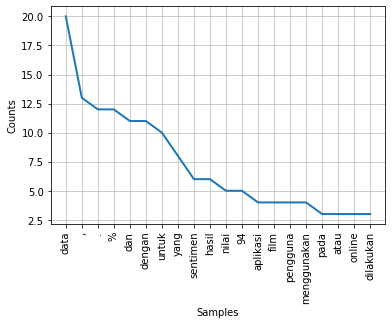

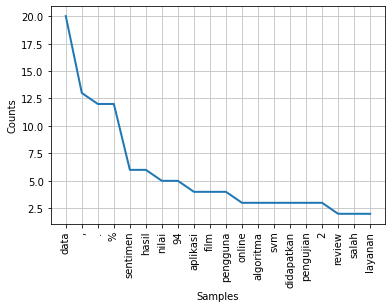

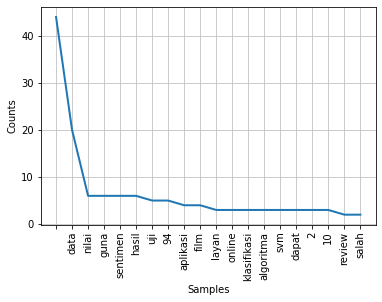

In [ ]:
freq_kata_1.plot(20)
freq_kata_2.plot(20)
freq_kata_3.plot(20)
plt.show()